In [1]:
import pandas as pd
import numpy as np

In [2]:
# Create an Array to store given column names
colNames = ["age", "emp_type", "number", "education", "ed_num", "marital_status", "occupation", "relationship", "race", "gender", "capital_gain","capital_loss","hours_per_week", "native_country", "income"]

# Create teh Dataframe
populationDF = pd.read_csv('population.csv', names=colNames)

# Begin Data clean up

In [3]:
# Print the columns
print(populationDF.columns)

# Print the number of rows and columns
print (populationDF.shape)

# explore the data and change any string categorical type fields to numbers
print (populationDF.head)
print (populationDF.dtypes)


Index(['age', 'emp_type', 'number', 'education', 'ed_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')
(32561, 15)
<bound method NDFrame.head of        age           emp_type  number    education  ed_num  \
0       39          State-gov   77516    Bachelors      13   
1       50   Self-emp-not-inc   83311    Bachelors      13   
2       38            Private  215646      HS-grad       9   
3       53            Private  234721         11th       7   
4       28            Private  338409    Bachelors      13   
...    ...                ...     ...          ...     ...   
32556   27            Private  257302   Assoc-acdm      12   
32557   40            Private  154374      HS-grad       9   
32558   58            Private  151910      HS-grad       9   
32559   22            Private  201490      HS-grad       9   
32560   52       Self-emp-inc  28792

In [4]:
# Explicitly Check for NaN data in original data before manipualtion
populationDF.isnull().sum()

age               0
emp_type          0
number            0
education         0
ed_num            0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
# based of what i am seeing, i am saying that
# "emp_type", "marital_status", "occupation", relationship, race, gender, income, and native_country can be recategorized
# i am skipping education because it has already been classified as a number in ed_num    

# List the unique values 
# populationDF = populationDF[populationDF.emp_type != ' ?']
# populationDF = populationDF[populationDF.occupation != ' ?']
# populationDF = populationDF[populationDF.native_country != ' ?']
# data["Age"]= data["Age"].replace(25.0, "Twenty five") 

# populationDF = populationDF['emp_type'].replace(' ?', ' Private')
# populationDF = populationDF['occupation'].replace(' ?', ' Prof-specialty')
# populationDF = populationDF['native_country'].replace(' ?', ' United-States')


print ('emp type: ')  
print(populationDF['emp_type'].value_counts())

print ('marital_status: ')
print(populationDF['marital_status'].value_counts())

print ('occupation: ') 
print(populationDF['occupation'].value_counts())

print ('relationship: ')
print(populationDF['relationship'].value_counts())

print ('race: ')
print(populationDF['race'].value_counts())

print ('gender: ') 
print(populationDF['gender'].value_counts())

print ('native_country: ')
print(populationDF['native_country'].value_counts())

print ('income: ')
print(populationDF['income'].value_counts())


emp type: 
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: emp_type, dtype: int64
marital_status: 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
occupation: 
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype

In [6]:
#  Perform the actual re-classification.

#Create dictionaries and re-assign
empType = {' State-gov':1, ' Self-emp-not-inc':2, ' Private':3, ' Federal-gov':4, ' Local-gov':5, ' ?':6, ' Self-emp-inc': 7, ' Without-pay':8, ' Never-worked':0}
populationDF.emp_type = [empType[item] for item in populationDF.emp_type]

maritalStatus = {' Never-married':1, ' Married-civ-spouse':2, ' Divorced':3, ' Married-spouse-absent':4, ' Separated':5, ' Married-AF-spouse':6 , ' Widowed':0}
populationDF.marital_status = [maritalStatus[item] for item in populationDF.marital_status]

occupationType = {' Adm-clerical':1, ' Exec-managerial':2, ' Handlers-cleaners':3, ' Prof-specialty':4, ' Other-service':5, ' Sales':6, ' Craft-repair':7, ' Transport-moving':8, ' Farming-fishing':9, ' Machine-op-inspct':10, ' Tech-support':11, ' ?':0, ' Protective-serv':12, ' Armed-Forces':13, ' Priv-house-serv':14}
populationDF.occupation = [occupationType[item] for item in populationDF.occupation]

relationshipType = {' Not-in-family':0, ' Husband':2, ' Wife':1, ' Own-child':3, ' Unmarried':4, ' Other-relative':5}
populationDF.relationship = [relationshipType[item] for item in populationDF.relationship]

raceType = {' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':4}
populationDF.race = [raceType[item] for item in populationDF.race]

genderType = {' Male':0, ' Female':1}
populationDF.gender = [genderType[item] for item in populationDF.gender]

countryType = {' United-States':4, ' Cuba':1, ' Jamaica':2, ' India':3, ' ?':42, ' Mexico':5, ' South':6, ' Puerto-Rico':7, ' Honduras':8, ' England':9, ' Canada':10, ' Germany':11, ' Iran':12, ' Philippines':13, ' Italy':14, ' Poland':15, ' Columbia':16, ' Cambodia':17, ' Thailand':18, ' Ecuador':19, ' Laos':20, ' Taiwan':21, ' Haiti':22, ' Portugal':23, ' Dominican-Republic':24, ' El-Salvador':25, ' France':26, ' Guatemala':27, ' China':28, ' Japan':29, ' Yugoslavia':30, ' Peru':31, ' Outlying-US(Guam-USVI-etc)':32, ' Scotland':33, ' Trinadad&Tobago':34, ' Greece':35, ' Nicaragua':36, ' Vietnam':37, ' Hong':38, ' Ireland':39, ' Hungary':40, ' Holand-Netherlands':41}
populationDF.native_country = [countryType[item] for item in populationDF.native_country]

incomeType = {' <=50K':1, ' >50K':0}
populationDF.income = [incomeType[item] for item in populationDF.income]

# Drop the education column as we have the edu_num column already,
populationDF = populationDF.drop('education', axis = 1)


In [7]:
# Fill in missing values (?) with the most frequent value

populationDF = populationDF.replace({'native_country':{42:4}}) # fill in ? with  United States
populationDF = populationDF.replace({'emp_type':{6:3}}) # Fill in ? with Private
populationDF = populationDF.replace({'occupation':{0:4}}) # Fill in ? with Prof-specialty


# verify replacement
print ('native_country: ')
print(populationDF['native_country'].value_counts())

print ('emp type: ')  
print(populationDF['emp_type'].value_counts())

print ('occupation: ') 
print(populationDF['occupation'].value_counts())


native_country: 
4     29753
5       643
13      198
11      137
10      121
7       114
25      106
3       100
1        95
9        90
2        81
6        80
28       75
14       73
24       70
37       67
27       64
29       62
15       60
16       59
21       51
22       44
12       43
23       37
36       34
31       31
26       29
35       29
19       28
39       24
38       20
34       19
17       19
20       18
18       18
30       16
32       14
40       13
8        13
33       12
41        1
Name: native_country, dtype: int64
emp type: 
3    24532
2     2541
5     2093
1     1298
7     1116
4      960
8       14
0        7
Name: emp_type, dtype: int64
occupation: 
4     5983
7     4099
2     4066
1     3770
6     3650
5     3295
10    2002
8     1597
3     1370
9      994
11     928
12     649
14     149
13       9
Name: occupation, dtype: int64


# Data cleanup complete.

+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

# Starting actual analysis.

In [8]:
#Set up the depent and independent arrays
x = populationDF[["age", "emp_type", "number",  "ed_num", "marital_status", "occupation", "relationship", "race", "gender", "capital_gain","capital_loss","hours_per_week", "native_country"]].copy(deep=True)
y = populationDF[['income']].copy(deep=True)

#Set up the training and testing data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler() 
sx = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(sx, y, test_size = 0.20, random_state = 4)



In [9]:
# SVM Model
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=4, probability=True) 
svclassifier.fit(x_train, y_train)
y_pred_svc = svclassifier.predict(x_test)

/home/izzy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/izzy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [10]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression(penalty='l2', C=1)
lrModel.fit(x_train, y_train)  
y_pred_lr = lrModel.predict(x_test)

/home/izzy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/izzy/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Confusion Table
[[ 446 1095]
 [ 133 4839]]
              precision    recall  f1-score   support

           0       0.77      0.29      0.42      1541
           1       0.82      0.97      0.89      4972

    accuracy                           0.81      6513
   macro avg       0.79      0.63      0.65      6513
weighted avg       0.80      0.81      0.78      6513

Base rate accuracy for svm is: 0.81
Logistic AUC = 0.63


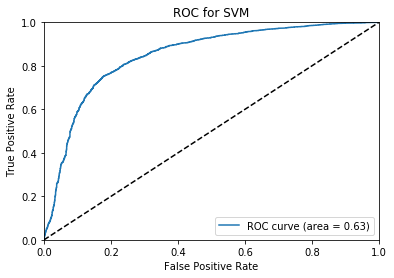


+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-

Logistic Regression Confusion Table
[[ 725  816]
 [ 287 4685]]
              precision    recall  f1-score   support

           0       0.72      0.47      0.57      1541
           1       0.85      0.94      0.89      4972

    accuracy                           0.83      6513
   macro avg       0.78      0.71      0.73      6513
weighted avg       0.82      0.83      0.82      6513

Base rate accuracy for svm is: 0.83
Logistic AUC = 0.71


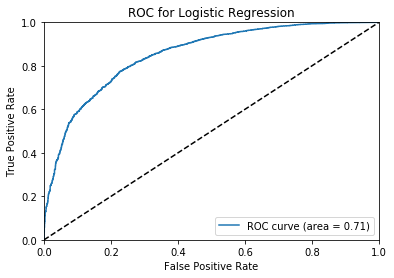

In [11]:
# Report results for all models
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

logit_roc_auc_svm = roc_auc_score(y_test, y_pred_svc)
logit_roc_auc_lr = roc_auc_score(y_test, y_pred_lr)

b_lr = lrModel.predict_proba(x_test)[:,1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, b_lr)


b_svm = svclassifier.predict_proba(x_test)[:,1]
fpr_svm, tpr_svm, threshold_lr = roc_curve(y_test, b_svm)


print ('SVM Confusion Table')
print (confusion_matrix(y_test,y_pred_svc))
print (classification_report(y_test,y_pred_svc))
print ("Base rate accuracy for svm is: %0.2f" %(accuracy_score(y_test, y_pred_svc)))
print("Logistic AUC = %0.2f" %logit_roc_auc_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, label='ROC curve (area = %0.2f)' %logit_roc_auc_svm)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM')
plt.legend(loc="lower right")
plt.show()

print ('\n' + '+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-' + '\n')

print ('Logistic Regression Confusion Table')
print (confusion_matrix(y_test,y_pred_lr))
print (classification_report(y_test,y_pred_lr))
print ("Base rate accuracy for svm is: %0.2f" %(accuracy_score(y_test, y_pred_lr)))
print("Logistic AUC = %0.2f" %logit_roc_auc_lr)


plt.figure()
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = %0.2f)' %logit_roc_auc_lr)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc="lower right")
plt.show()